- [ ] Analyze the age distribution of customers, and identify any trends or patterns in spending behavior, credit limit, and utilization ratio across different age groups.
- [ ] Explore differences in spending patterns, credit limits, and utilization ratios between male and female customers.
- [ ] Investigate if the number of dependents influences spending behavior, credit limit, and utilization ratio.
- [ ] Determine if there's a relationship between customers' education levels and their spending behavior, credit limit, and utilization ratio.
- [ ] Assess if marital status has an impact on spending patterns, credit limits, and utilization ratios.
- [ ] Examine how income levels affect spending behavior, credit limit, and utilization ratio.
- [ ] Investigate if card types are associated with specific demographic segments, and how they may influence spending behavior, credit limit, and utilization ratio.

Consider visualizations such as bar charts, pie charts, or histograms to present the data and reveal trends within each demographic segment.


- [ ] Clustering Algorithms: Use unsupervised learning techniques such as K-means, DBSCAN, or hierarchical clustering to group customers based on their demographic features. This can help identify distinct customer segments and reveal patterns in spending behavior or credit usage.
- [ ] Decision Trees: Build a decision tree model to identify the most important demographic features influencing customer behavior or to predict customer churn based on demographic data.
- [ ] Association Rule Learning: Apply algorithms like Apriori or Eclat to identify relationships between demographic features and spending behavior, which can be useful in understanding customer preferences and designing targeted marketing campaigns.
- [ ] Classification Models: Train classification models like logistic regression, support vector machines, or random forests to predict customer churn or other behavior-based outcomes using demographic data.

Remember to preprocess the data and perform feature engineering as needed to ensure optimal model performance.

## Introduction

Credit card companies need to understand customer behavior to retain customers and ensure their satisfaction. Analyzing demographic characteristics can reveal insights into spending patterns and credit card usage.

In this project, I will analyze a dataset containing demographic information and credit card usage details. My goal is to identify distinct customer segments based on demographic factors and understand how these factors influence spending behavior, credit limit, and utilization ratio. By uncovering trends within each demographic segment, I aim to provide valuable insights for improved customer satisfaction and retention.

In [ ]:
import sys
!conda install --yes --quiet --prefix {sys.prefix} \
numpy \
pandas \
matplotlib \
seaborn \
pandas-profiling==3.6.6

In [5]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import pandas_profiling
from IPython.display import display

## Data Exploration

In [6]:
df = pd.read_csv('./data/BankChurners.csv')

In [7]:
df.shape

(10127, 23)

In [8]:
df.head(1)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991


## Data Cleaning and Preprocessing

In [12]:
column_renames = {
    'CLIENTNUM': 'client_id',
    'Attrition_Flag': 'churn_status',
    'Customer_Age': 'age',
    'Gender': 'gender',
    'Dependent_count': 'dependents',
    'Education_Level': 'education_level',
    'Marital_Status': 'marital_status',
    'Income_Category': 'income_category',
    'Card_Category': 'card_category',
    'Months_on_book': 'months_on_book',
    'Total_Relationship_Count': 'total_relationships',
    'Months_Inactive_12_mon': 'months_inactive',
    'Contacts_Count_12_mon': 'contacts',
    'Credit_Limit': 'credit_limit',
    'Total_Revolving_Bal': 'revolving_balance',
    'Avg_Open_To_Buy': 'available_credit',
    'Total_Amt_Chng_Q4_Q1': 'change_in_purchase_amt',
    'Total_Trans_Amt': 'total_purchase_amt',
    'Total_Trans_Ct': 'total_purchase_ct',
    'Total_Ct_Chng_Q4_Q1': 'change_in_purchase_ct',
    'Avg_Utilization_Ratio': 'credit_utilization',
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1': 'naive_bayes_1',
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2': 'naive_bayes_2'
}


In [28]:
# Standardize column names
df = df.rename(columns=column_renames)
df.columns

Index(['client_id', 'churn_status', 'age', 'gender', 'dependents',
       'education_level', 'marital_status', 'income_category', 'card_category',
       'months_on_book', 'total_relationships', 'months_inactive', 'contacts',
       'credit_limit', 'revolving_balance', 'available_credit',
       'change_in_purchase_amt', 'total_purchase_amt', 'total_purchase_ct',
       'change_in_purchase_ct', 'credit_utilization', 'naive_bayes_1',
       'naive_bayes_2'],
      dtype='object')

In [72]:
FIG_SIZE = (10, 6)

def density_plot(df, factor, hue):
    # Plot distribution of age by attrition flag
    plt.figure(figsize=FIG_SIZE)
    sns.kdeplot(data=df, x=factor, hue=hue, shade=True, alpha=0.8)
    plt.title(f'Distribution of {factor} by {hue}')
    plt.xlabel(factor)
    plt.ylabel('Density')
    plt.show()

In [64]:
bins = [0, 18, 25, 35, 45, 55, 65, 75, 100]
labels = ['0-18', '18-25', '25-35', '35-45', '45-55', '55-65', '65-75', '75+']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels)

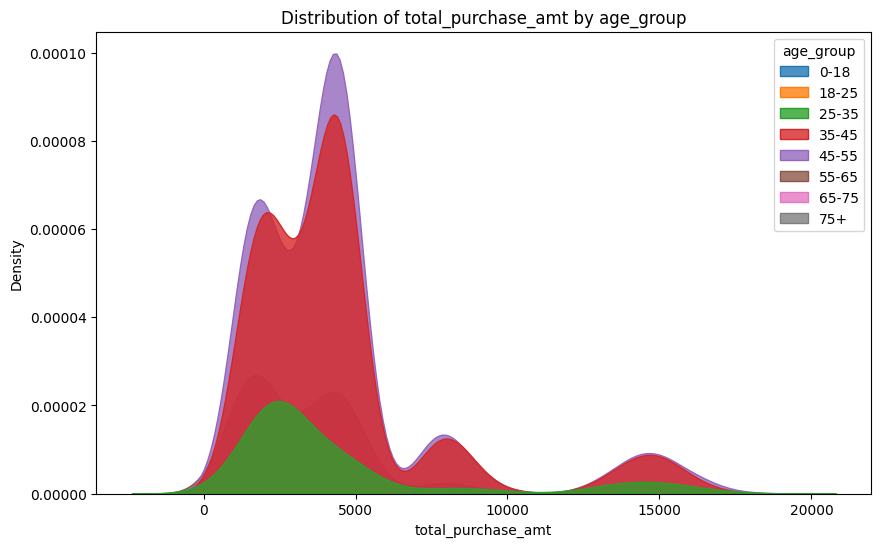

In [75]:
# spending behavior, credit limit, and utilization ratio across different age groups
# density_plot(df=df, factor='age', hue='churn_status')
# density_plot(df=df, factor='credit_utilization', hue='age_group')  # TODO fix invisible overlaps
# density_plot(df=df, factor='credit_limit', hue='age_group')  # TODO fix invisible overlaps
density_plot(df=df, factor='total_purchase_amt', hue='age_group')  # TODO fix invisible overlaps

In [43]:
# profile = df.profile_report(title='Pandas Profiling Report', dark_mode=True)
# # profile.to_notebook_iframe()

# help(profile)

## Modelling

## Results and Interpretation

## Conclusions